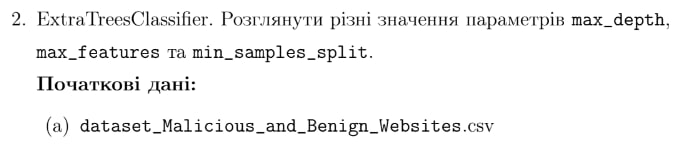

In [708]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
# для пошуку зміщення та дисперсії ми будемо використовувати бібліотеку mlxtend
# conda install -c conda-forge mlxtend
from mlxtend.evaluate import bias_variance_decomp

sns.set(rc={'figure.figsize':(14, 8)})

In [709]:
def scoring_and_matrix(y_true, y_predicted):
    confussion = metrics.confusion_matrix(y_true, y_predicted)
    sns.heatmap(confussion, annot=True, fmt='g', cmap='Blues')
    print(f'accuracy: {metrics.accuracy_score(y_true, y_predicted)} \n \
    precision: {metrics.precision_score(y_true, y_predicted)} \n \
    recall: {metrics.recall_score(y_true, y_predicted)} \n \
    f1_score: {metrics.f1_score(y_true, y_predicted)}' )

In [710]:
def bias_var(bias, var):
    print(f'Bias: {bias}, var: {var}')

In [711]:
def gridsearchscore(classifier):
    print(f'Best score: {classifier.best_score_}, Best params: {classifier.best_params_}')

In [712]:
dataset = pd.read_csv('maliciouswebsites.csv')

In [713]:
dataset.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M0_109,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [714]:
dataset.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

Ми видалимо URL, тому що це усе унікальні значення, і CONTENT_LENGTH, тому що там майже 50% відсутнє

In [715]:
dataset.drop(['CONTENT_LENGTH', 'URL'], axis=1, inplace=True)
dataset.dropna(inplace=True)

In [716]:
dataset.isnull().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [717]:
dataset.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Видалимо усі категоріальні ознаки, через складність їх кодування в числові ознаки, та їх сумнівну необхідність

In [718]:
dataset.drop(['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

<AxesSubplot: >

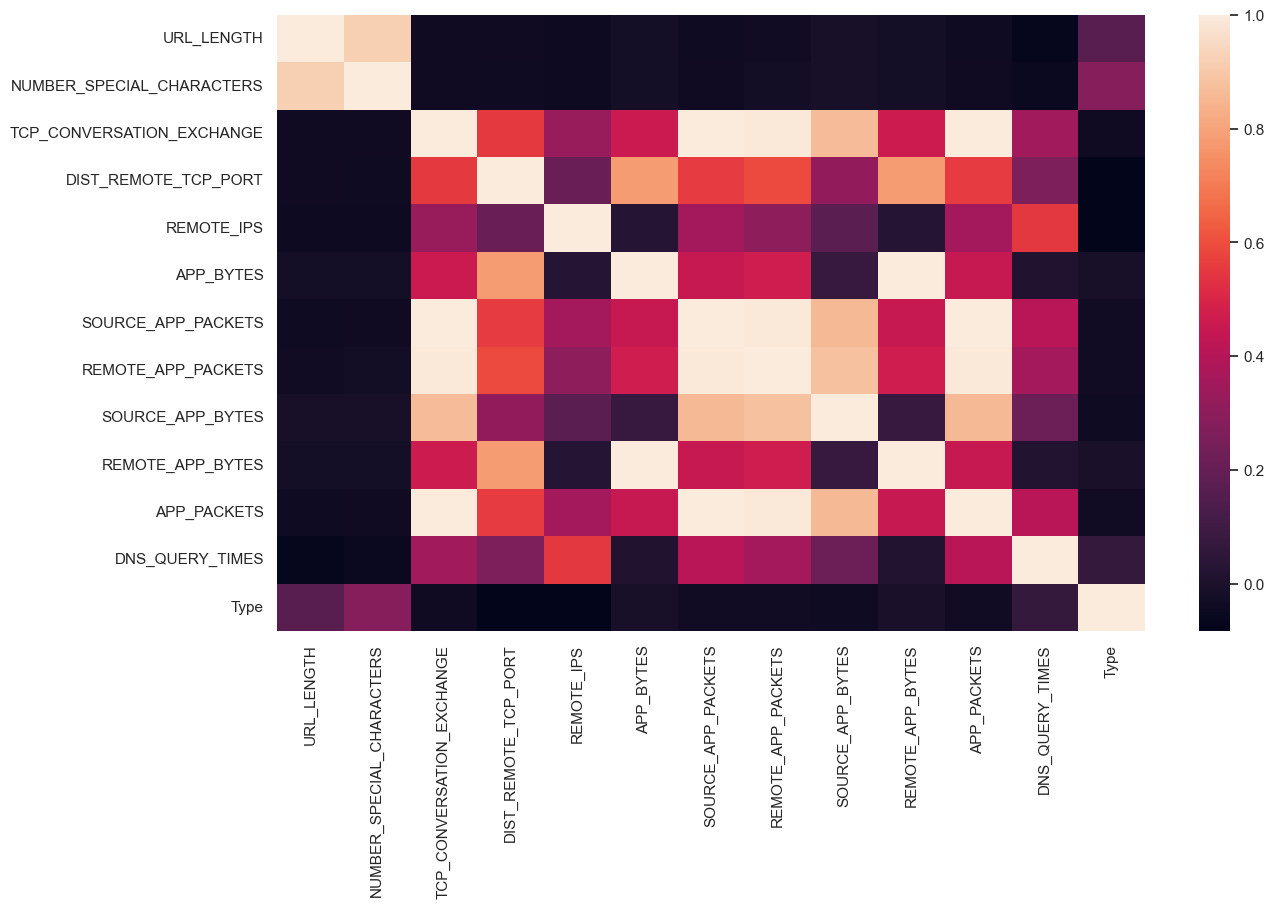

In [719]:
sns.heatmap(dataset.corr())

Видалимо ті ознаки, що мають високу кореляцію з іншими <br>
Також я видалю ті, які на мою думку не потрібні для моделі (наприклад 'NUMBER_SPECIAL_CHATACTERS', вона має високу кореляцію из 'URL_LENGTH', та і на мою думку є зайвою)

In [720]:
dataset.drop(['NUMBER_SPECIAL_CHARACTERS', 'SOURCE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE', 'REMOTE_APP_BYTES', 'REMOTE_APP_PACKETS'], axis=1, inplace=True)

<AxesSubplot: >

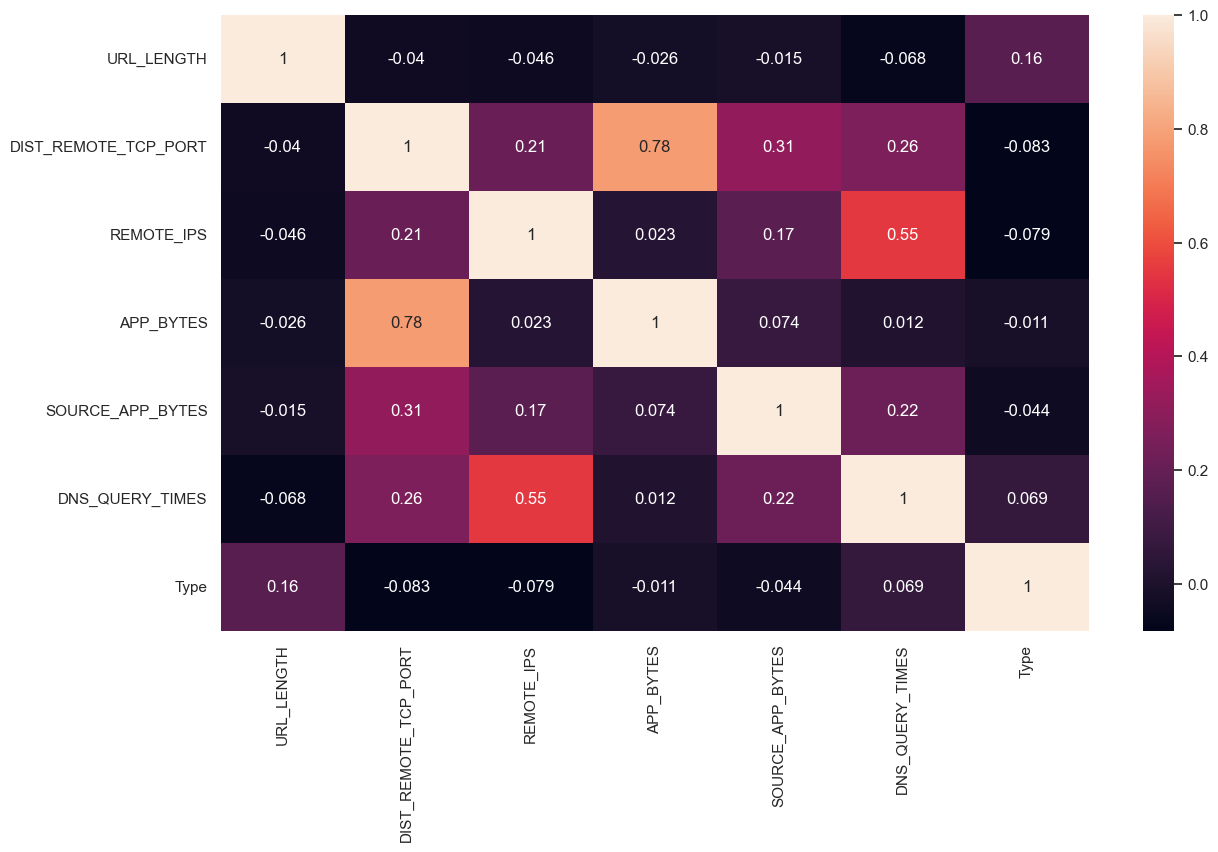

In [721]:
sns.heatmap(dataset.corr(), annot=True)

Не всі ознаки з великою кореляцією були видалені, тому що дерева рішень не є лінійною моделью і на мою думку не буде поганим рішень тут залишити ще декілька ознак

In [722]:
dataset.dtypes

URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

In [723]:
y_full = dataset['Type']
X_full = dataset.drop(['Type'], axis=1)

Оскільки дані не 2-D, то вони не будуть представлені графічно

In [724]:
from sklearn.model_selection import train_test_split

X, X_perevirka, y, y_perevirka = train_test_split(X_full, y_full, test_size=0.3, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

<font size="5">Спочатку спробуємо звичайне дерево:</font>

In [725]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

In [726]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [727]:
tree.get_depth()

15

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


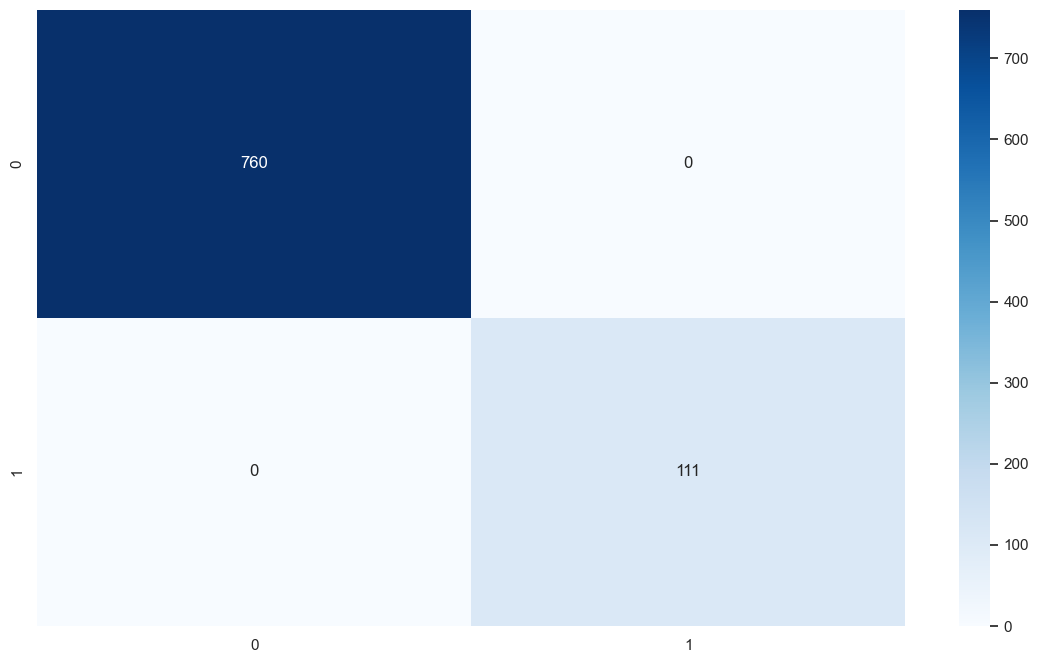

In [728]:
y_predict = tree.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.9438502673796791 
     precision: 0.74 
     recall: 0.8222222222222222 
     f1_score: 0.7789473684210526


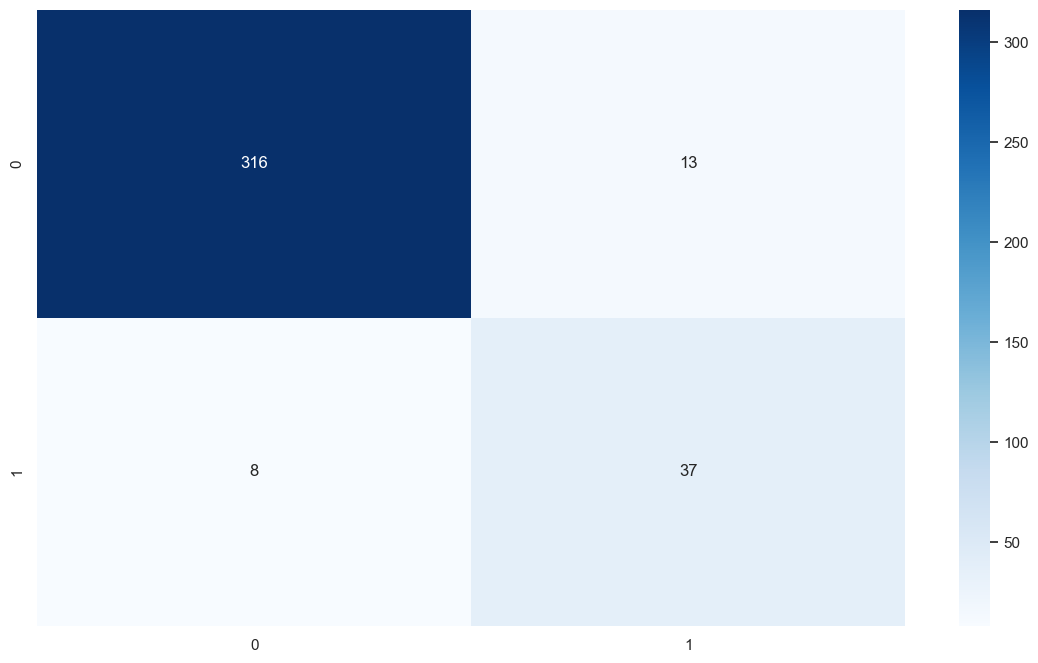

In [729]:
y_predict = tree.predict(X_test)

scoring_and_matrix(y_test, y_predict)

accuracy: 0.9419475655430711 
     precision: 0.7457627118644068 
     recall: 0.7333333333333333 
     f1_score: 0.7394957983193278


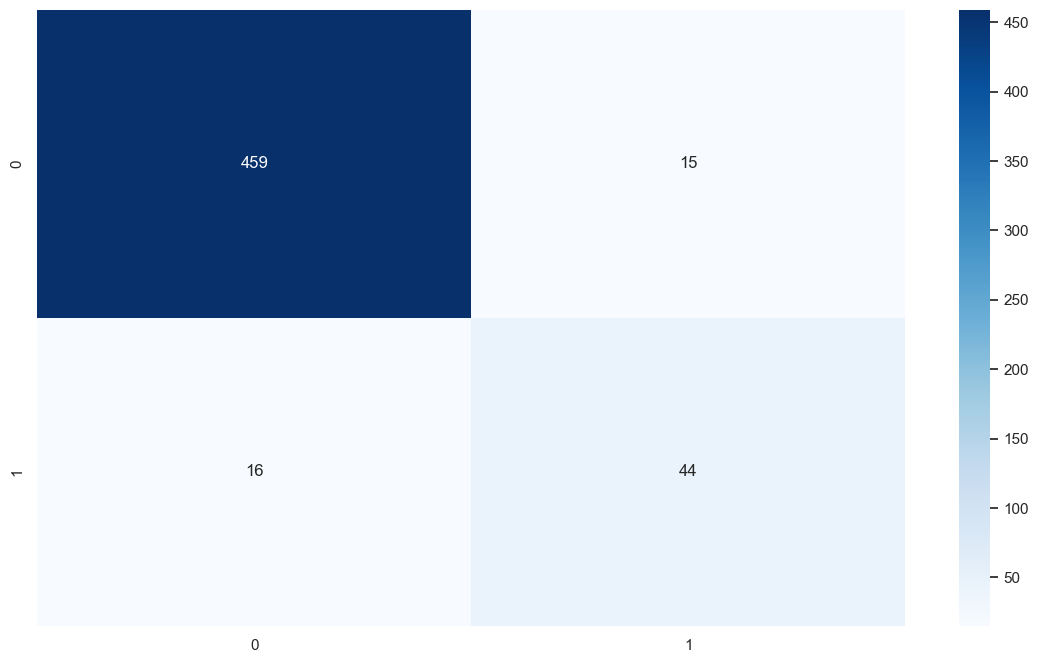

In [730]:
y_predict = tree.predict(X_perevirka)

scoring_and_matrix(y_perevirka, y_predict)

Оскільки навіть зі звичайними параметрами ми отримуємо дуже високі значення метрик, то налаштування гіперпараметрів не є необхідним

In [731]:
mse, bias, var = bias_variance_decomp(tree, X_train.values, \
    y_train.values, X_test.values, y_test.values, random_seed=17)
bias_var(bias, var)

Bias: 0.045454545454545456, var: 0.0542379679144385


Задля будування графіку залежності значень показника якостi ансамблю та iндивiдуальної моделi вiд n_estimators ми створимо array (np.array), куди будемо додавати значення x=n_estimators, y=accuracy_score

Також спочатку ми зробимо декілька ансамблів на різні значення n_estimators, а згодом будемо налаштовувати інші гіперпараметри для моделі яка покаже себе найкраще у співвідношенні часу навчання до точності

In [732]:
from sklearn.ensemble import ExtraTreesClassifier

ensemble = ExtraTreesClassifier(n_estimators=10)

In [733]:
ensemble.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=10)

In [734]:
array = np.array([[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]])

In [735]:
ensemble = ExtraTreesClassifier(n_estimators=20)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [736]:
ensemble = ExtraTreesClassifier(n_estimators=30)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [737]:
ensemble = ExtraTreesClassifier(n_estimators=40)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [738]:
ensemble = ExtraTreesClassifier(n_estimators=50)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [739]:
ensemble = ExtraTreesClassifier(n_estimators=60)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [740]:
ensemble = ExtraTreesClassifier(n_estimators=60)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [741]:
ensemble = ExtraTreesClassifier(n_estimators=70)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [742]:
ensemble = ExtraTreesClassifier(n_estimators=80)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [743]:
ensemble = ExtraTreesClassifier(n_estimators=90)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

In [744]:
ensemble = ExtraTreesClassifier(n_estimators=100)
ensemble.fit(X_train, y_train)
array = np.append(array, [[len(ensemble.estimators_), metrics.accuracy_score(y_perevirka, ensemble.predict(X_perevirka))]], axis=0)

c:\Users\Kidma\anaconda3\envs\epam\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


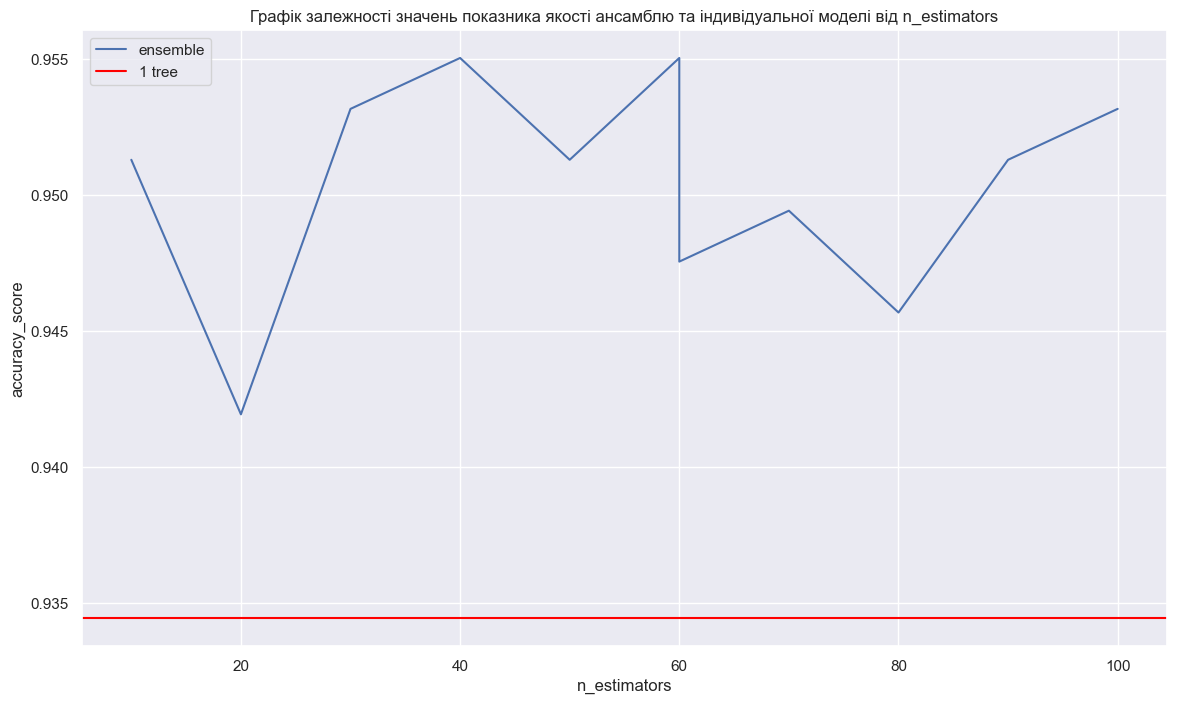

In [745]:
plt.plot(array[:, 0], array[:, 1], label='ensemble')
plt.axhline(y=metrics.accuracy_score(y_perevirka, tree.predict(X_perevirka)), color='red', label='1 tree')
plt.title('Графік залежності значень показника якостi ансамблю та iндивiдуальної моделi вiд n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('accuracy_score')
plt.legend(loc="upper left")

Насправді немає великої різниці між тим яку модель далі досліджувати, вони усі мають приблизно однакові значення accuracy_score, та майже однаково швидко навчаються <br>
Але дуже помітно, що усі моделі значення accuracy_score мають вище ніж у звичайного дерева (дерево без налаштованих параметрів)

In [746]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 3, 5, 10, 15]
    }

gridsearch = GridSearchCV(ensemble, param_grid, scoring='accuracy', n_jobs=-1)

In [747]:
gridsearch.fit(X, y)

GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 3, 5, 10, 15]},
             scoring='accuracy')

In [748]:
gridsearchscore(gridsearch)

Best score: 0.9445783132530121, Best params: {'max_depth': 15, 'max_features': None, 'min_samples_split': 5}


accuracy: 0.9919632606199771 
     precision: 1.0 
     recall: 0.9369369369369369 
     f1_score: 0.9674418604651163


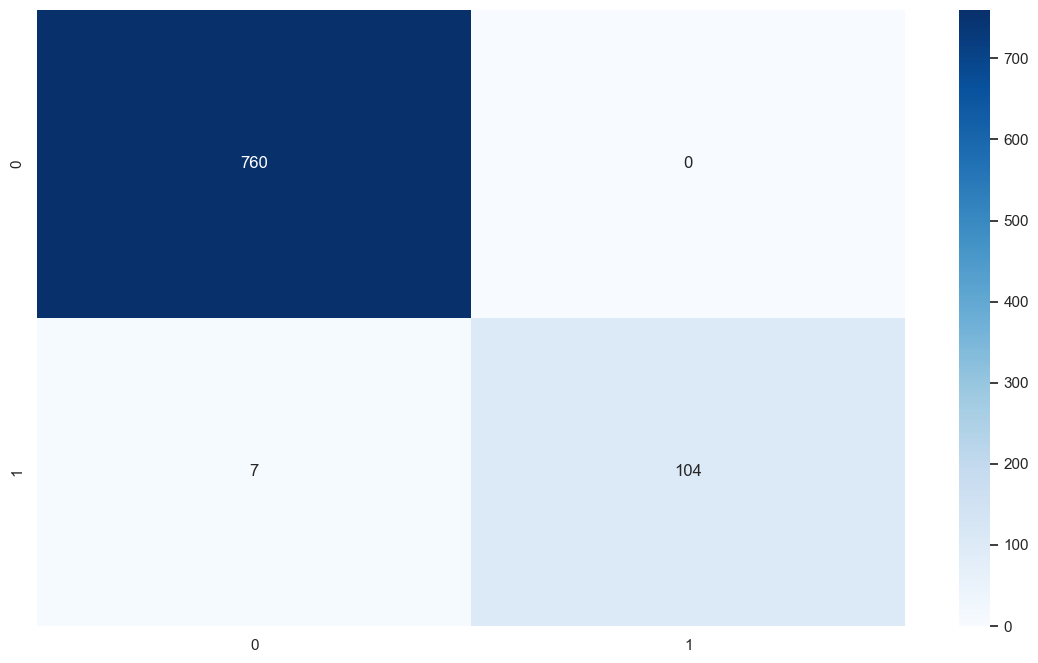

In [749]:
y_predict = gridsearch.predict(X_train)

scoring_and_matrix(y_train, y_predict)

accuracy: 0.9973262032085561 
     precision: 1.0 
     recall: 0.9777777777777777 
     f1_score: 0.9887640449438202


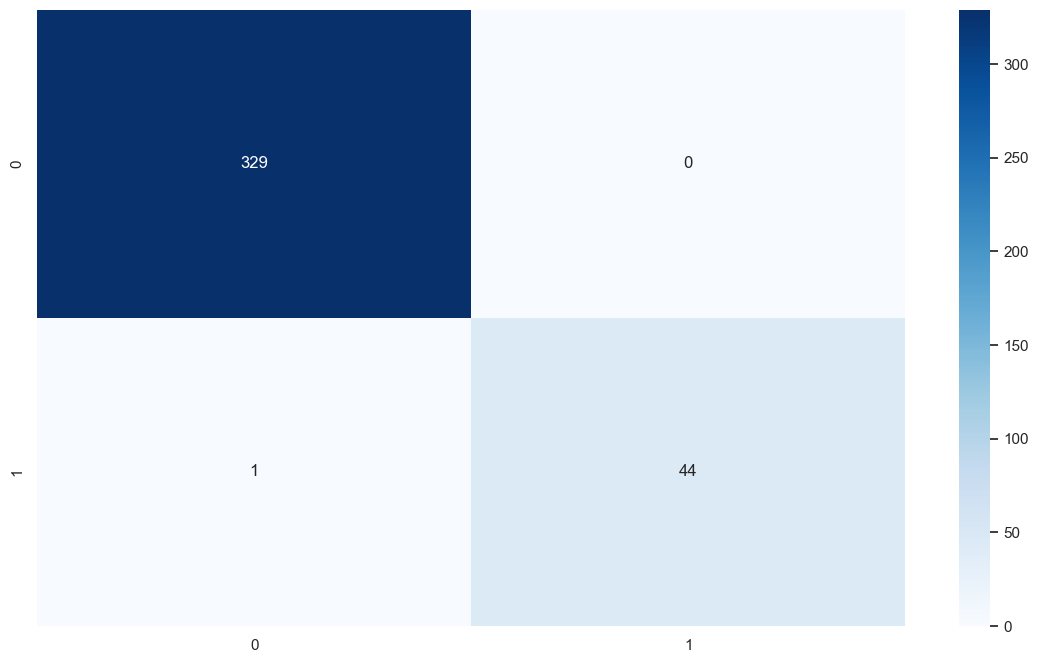

In [750]:
y_predict = gridsearch.predict(X_test)

scoring_and_matrix(y_test, y_predict)

accuracy: 0.9400749063670412 
     precision: 0.7692307692307693 
     recall: 0.6666666666666666 
     f1_score: 0.7142857142857142


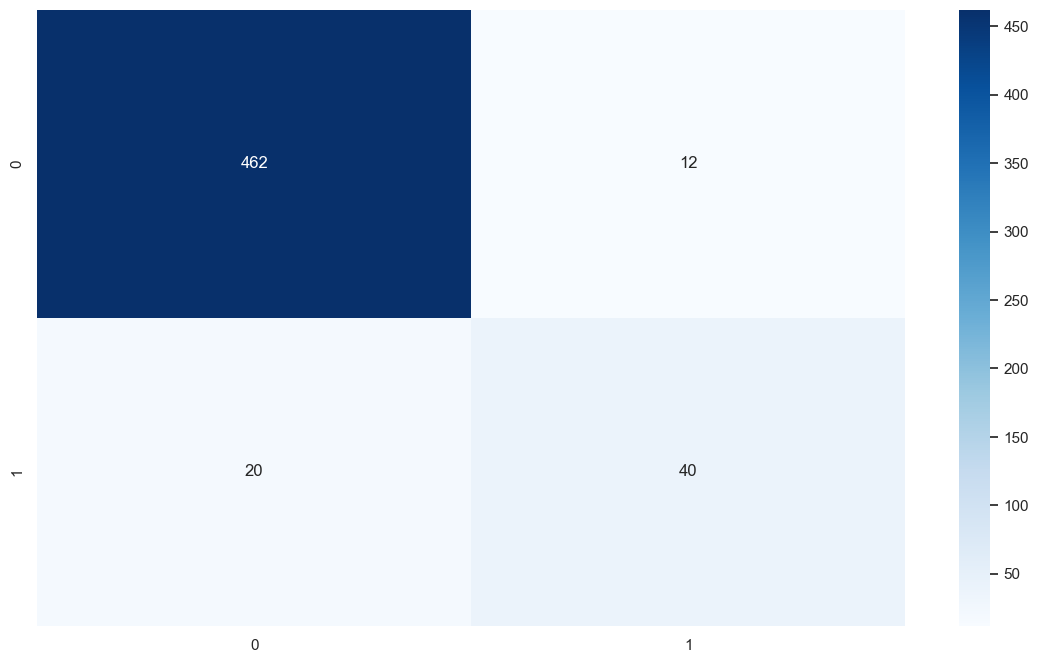

In [751]:
y_predict = gridsearch.predict(X_perevirka)

scoring_and_matrix(y_perevirka, y_predict)

In [752]:
mse, bias, var = bias_variance_decomp(gridsearch.best_estimator_, X_train.values, \
    y_train.values, X_test.values, y_test.values, random_seed=13)
bias_var(bias, var)

Bias: 0.040106951871657755, var: 0.02747326203208556


Зміщення дуже близьке до однієй моделі, дисперсія у ансамблю трохи краща, але ця різниця дуже низька як і самі значення зміщення та дисперсії як у однієї моделі, так і у ансамблю

Час навчання у цих моделей дуже швидкий, навіть ансамбль із 100 дерев навчався швидко, але помітно повільніше, але ансамблю дав приріст точності у ~0.04, що на мою думку досить вискоий показник коли мова йде про точність >0.93

<font size='5'><b> Висновок: </b> </font> <br>
На заданих даних ансамбль показав себе краще ніж індивідуальна модель, не сильно збільшучи час навчання